In [1]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv("Customer Churn.csv")

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [14]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,No,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


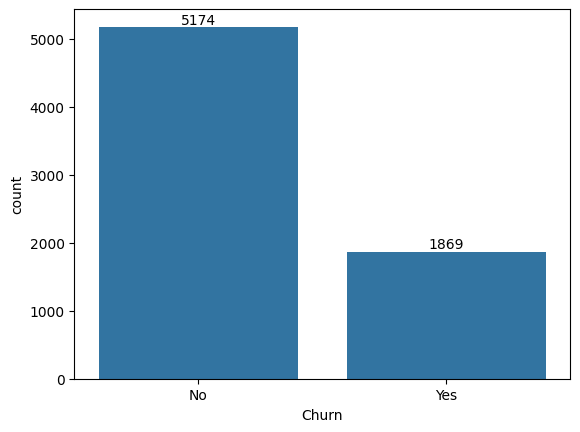

In [16]:
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0]) 
plt.show()

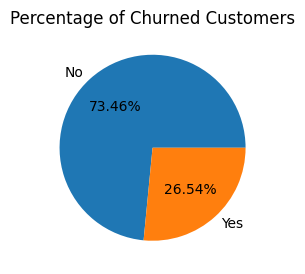

In [21]:
plt.figure(figsize =(3,4))
gb = df.groupby("Churn").agg({'Churn':'count'})
gb
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers")
plt.show()

In [ ]:
# with this pie chart we can conclude that 26.54% customers have churned out.


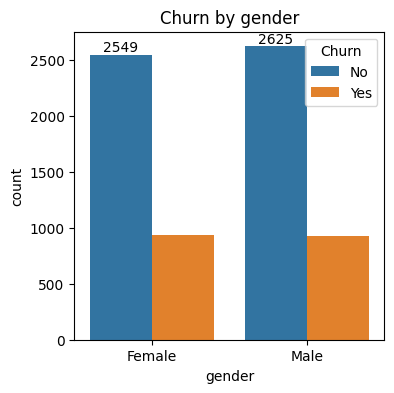

In [25]:
plt.figure(figsize = (4,4))
ax= sns.countplot(x = "gender", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by gender")
plt.show()

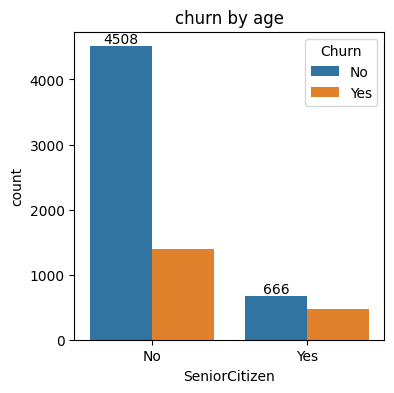

In [26]:
plt.figure(figsize = (4,4))
ax= sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("churn by age")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_8116\676599772.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bottom = [bottom[i] + values[i] for i in range(len(values))]


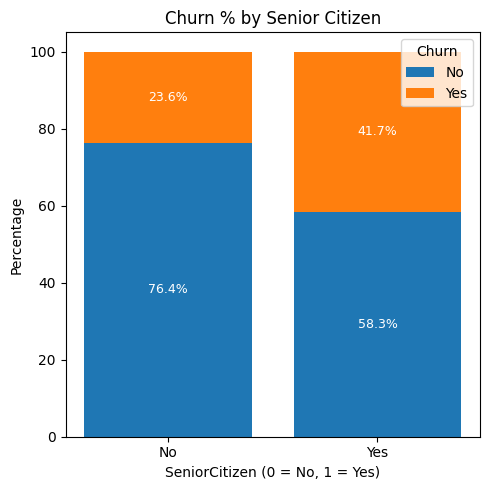

In [27]:
# Step 1: Create a cross-tab of counts
count_data = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert to percentages (row-wise)
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))

bottom = [0] * len(percent_data)  # initialize the bottom for stacking
categories = percent_data.columns

for category in categories:
    values = percent_data[category]
    bars = ax.bar(percent_data.index, values, bottom=bottom, label=category)

    # Add labels
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2,
                bottom[i] + height / 2,
                f'{height:.1f}%',
                ha='center', va='center', color='white', fontsize=9)
    
    # Update the bottom for the next stack
    bottom = [bottom[i] + values[i] for i in range(len(values))]

# Final plot settings
ax.set_title("Churn % by Senior Citizen")
ax.set_xlabel("SeniorCitizen (0 = No, 1 = Yes)")
ax.set_ylabel("Percentage")
ax.legend(title="Churn")
plt.tight_layout()
plt.show()


In [ ]:
#comparatively young, senior citizen has churned more than young


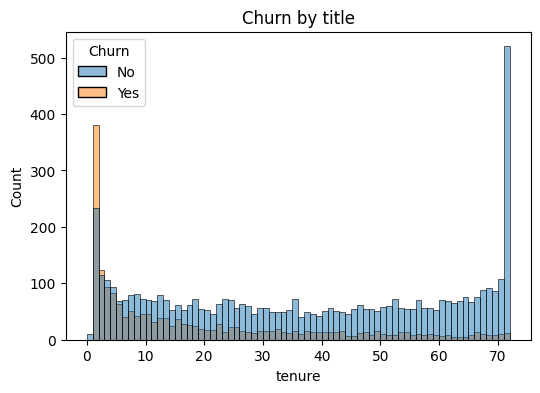

In [31]:
plt.figure(figsize = (6,4))
sns.histplot(x= "tenure", data = df , bins = 72, hue ="Churn")
plt.title("Churn by title")
plt.show()

In [ ]:
#people who has used services for 1-2 months have churned out however people who stayed longer has not churned out.


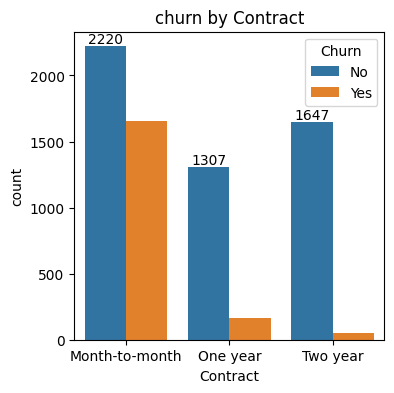

In [32]:
plt.figure(figsize = (4,4))
ax= sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("churn by Contract")
plt.show()

In [36]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

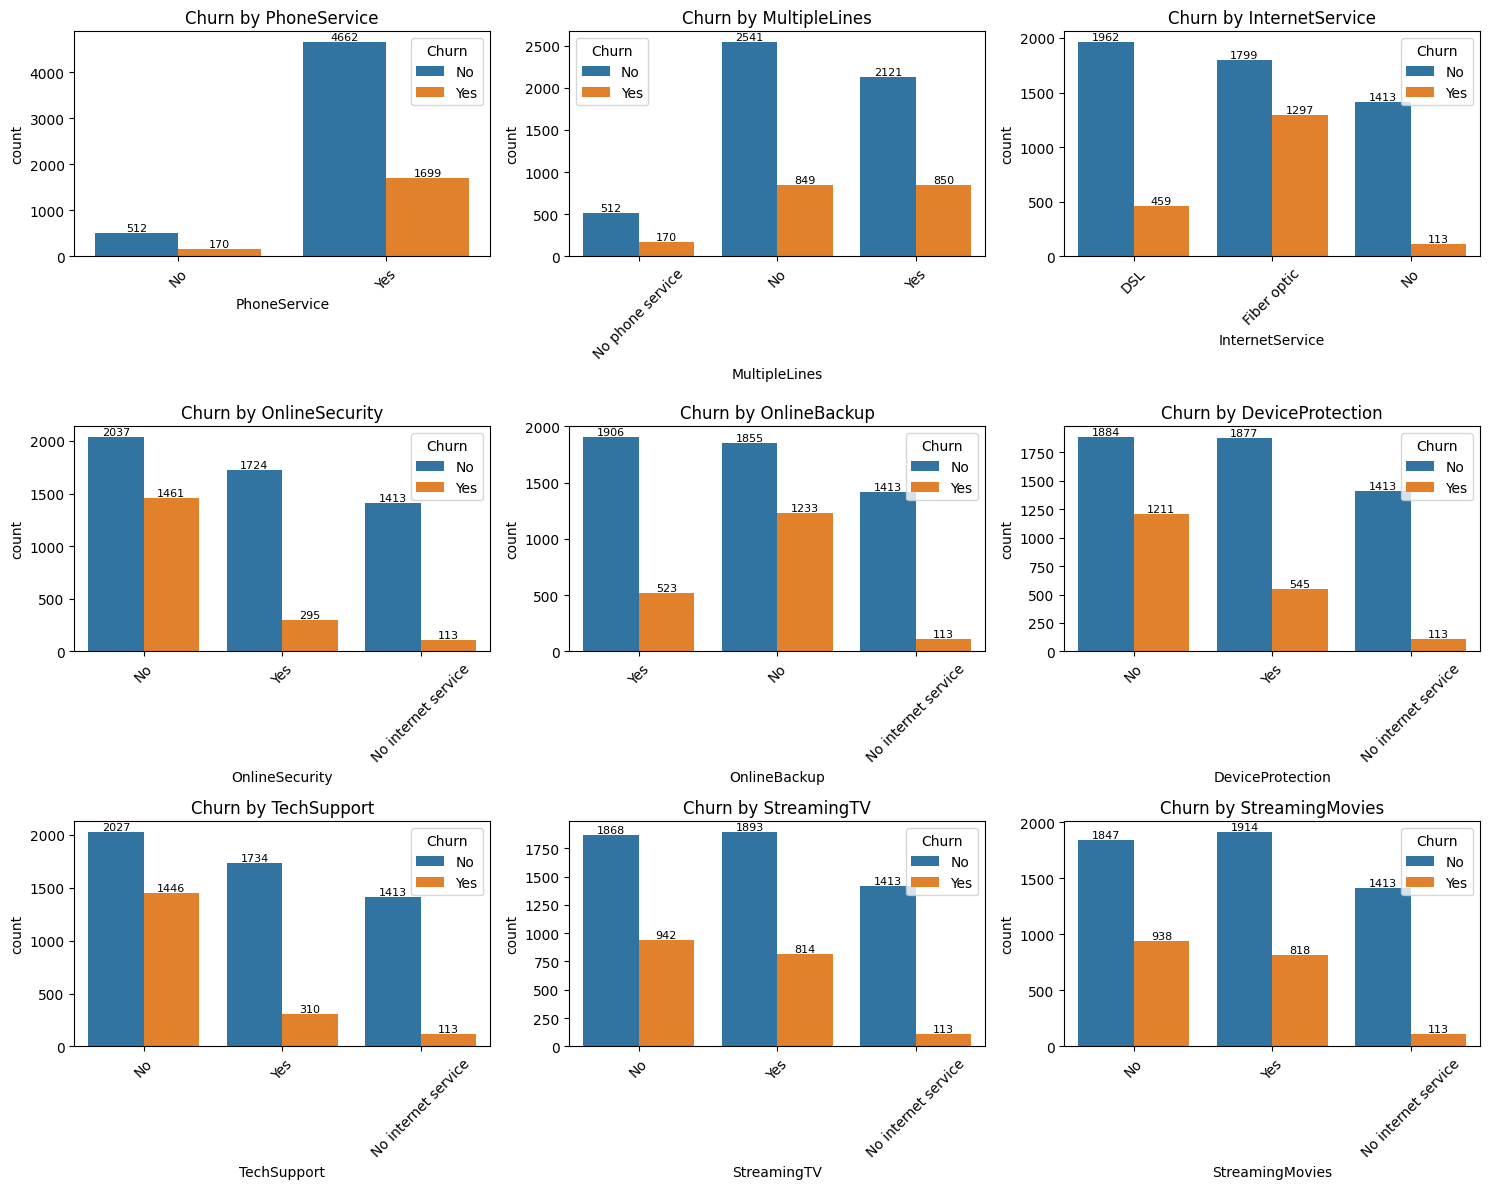

In [37]:
# List of columns you want to plot
columns_to_plot = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3 rows, 3 columns

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through columns and plot
for i, col in enumerate(columns_to_plot):
    ax = sns.countplot(x=col, data=df, hue='Churn', ax=axes[i])
    ax.set_title(f"Churn by {col}")
    ax.tick_params(axis='x', rotation=45)
    
    # Add count labels on bars
    for container in ax.containers:
        ax.bar_label(container, fontsize=8)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


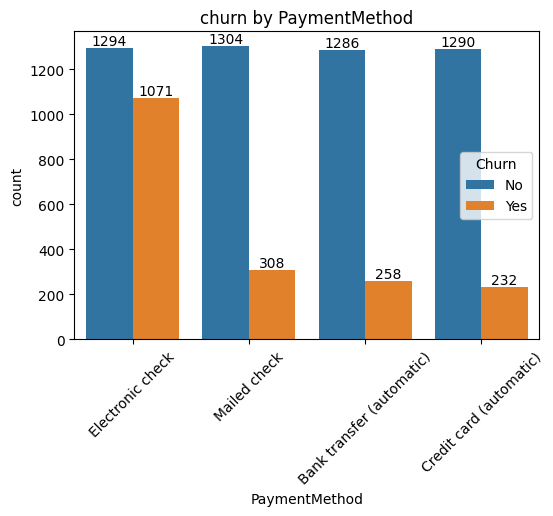

In [41]:
plt.figure(figsize = (6,4))
ax= sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("churn by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()